## Read Data

In [ ]:
import csv
import pandas as pd
from numpy.lib.arraysetops import unique
import io
import numpy as np
from collections.abc import Iterable
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/EWS Trafo/Health index1.csv')
data.keys()

Index(['Hydrogen', 'Oxigen', 'Nitrogen', 'Methane', 'CO', 'CO2', 'Ethylene',
       'Ethane', 'Acethylene', 'DBDS', 'Power factor', 'Interfacial V',
       'Dielectric rigidity', 'Water content', 'Health index',
       'Life expectation'],
      dtype='object')

In [ ]:
data

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,15,227,52900,3,60,853,3,84,0,0.0,1.00,32,56,28,13.4,51.0
466,15,334,47100,3,64,622,3,108,0,0.0,1.00,32,55,12,13.4,51.0
467,15,1280,35000,2,675,2530,0,0,0,5.0,0.30,45,58,8,13.4,6.5
468,15,169,50600,5,77,532,0,72,0,0.0,1.21,33,54,11,13.4,51.0


##Analisis Korelasi, untuk melihat hubungan hasil sensor antar Gas di suatu tempat

In [ ]:
from numpy.core.fromnumeric import size
import numpy as np

df_baru = pd.DataFrame(data)

conditions = [(df_baru['Health index'] >= 70) & (df_baru['Health index'] <= 100),
              (df_baru['Health index'] >= 50) & (df_baru['Health index'] < 70),
              (df_baru['Health index'] >= 30) & (df_baru['Health index'] < 50),
              (df_baru['Health index'] >= 0) & (df_baru['Health index'] < 30)]

values = [3, 2, 1, 0]


df_baru['Condition'] = np.select(conditions, values)

df_baru_analisis = df_baru.replace(np.nan).dropna()

In [ ]:
np.round(df_baru_analisis[df_baru_analisis['Condition']==3],4)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,Condition
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2,19.0,3
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5,19.0,3
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3,19.0,3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3,6.0,3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2,6.0,3
5,13500,343,36500,3150,113,984,5,1230,1,1.0,4.93,37,52,6,75.6,6.0,3
6,10200,11900,33700,573,87,611,0,162,0,1.0,3.53,45,55,5,75.6,6.0,3
7,3,15459,41347,5,68,902,12,2,13,5.0,0.58,41,71,6,73.2,19.0,3
8,16,2470,59600,8,520,2660,5,8,2,164.0,0.29,44,56,4,72.8,6.0,3


In [ ]:
np.round(df_baru_analisis.corr(method ='pearson').sort_values(by="Health index", ascending=False),4)

,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index,Life expectation,Condition
Health index,0.3774,0.1210,0.0895,0.3618,0.1128,0.1688,0.2715,0.2365,0.2401,0.4688,0.0927,0.4002,-0.1044,-0.2812,1.0000,-0.6278,0.9550
Condition,0.4496,0.1345,0.0710,0.3810,0.1298,0.1781,0.2770,0.2527,0.2950,0.3529,0.1462,0.3707,-0.1062,-0.2582,0.9550,-0.5735,1.0000
DBDS,-0.0486,-0.0330,0.1527,-0.0231,0.0593,0.0802,-0.0298,-0.0475,-0.0507,1.0000,-0.0649,0.1834,-0.0647,-0.2074,0.4688,-0.3996,0.3529
Interfacial V,0.1011,0.2198,-0.0785,0.1127,0.1442,0.0374,0.1036,0.0091,0.1364,0.1834,-0.2097,1.0000,-0.0784,-0.4648,0.4002,-0.5964,0.3707
Hydrogen,1.0000,-0.0550,-0.1140,0.6346,-0.0293,0.0164,0.4423,0.4822,0.3550,-0.0486,0.2275,0.1011,0.0518,-0.0762,0.3774,-0.1454,0.4496
Methane,0.6346,-0.0356,-0.1010,1.0000,-0.0078,0.0631,0.8011,0.9146,0.2301,-0.0231,0.0703,0.1127,0.0269,-0.0396,0.3618,-0.1332,0.3810
Ethylene,0.4423,-0.0106,-0.0664,0.8011,-0.0259,0.0368,1.0000,0.7553,0.2551,-0.0298,0.0149,0.1036,0.0220,-0.0066,0.2715,-0.0920,0.2770
Acethylene,0.3550,0.2076,-0.0113,0.2301,-0.0148,-0.0118,0.2551,0.2063,1.0000,-0.0507,-0.0195,0.1364,-0.0079,-0.0742,0.2401,-0.0755,0.2950
Ethane,0.4822,-0.0733,-0.0586,0.9146,-0.0997,-0.0067,0.7553,1.0000,0.2063,-0.0475,0.0414,0.0091,0.0254,0.0297,0.2365,-0.0229,0.2527
CO2,0.0164,-0.0473,0.1342,0.0631,0.5554,1.0000,0.0368,-0.0067,-0.0118,0.0802,0.3094,0.0374,-0.0766,0.0761,0.1688,-0.1585,0.1781


##Pembagian Data

In [ ]:
def normalisasi_data(data_input, data_input1):
  try:
    data_baru = data_input.copy()
    panjang_x = len(data_input[:,0])
    panjang_y = len(data_input[0,:])
    for j in np.arange(0,panjang_y):
      for i in np.arange(0,panjang_x):
        data_baru[i,j]=(data_input[i,j]-np.min(data_input1[:,j]))/(np.max(data_input1[:,j])-np.min(data_input1[:,j]))

    return np.float64(data_baru)

  except:
    data_baru = data_input.copy()
    panjang = len(data_input)
    for j in np.arange(0,panjang):
        data_baru[j]=(data_input[j]-np.min(data_input1))/(np.max(data_input1)-np.min(data_input1))

    return np.float64(data_baru)

In [ ]:
def balikin_normalisasi(data_input1, data_asli1):
  try:
    data_baru1 = data_input1.copy()
    panjang_x = len(data_baru1[:,0])
    panjang_y = len(data_baru1[0,:])
    for j in np.arange(0,panjang_y):
      for i in np.arange(0,panjang_x):
        data_baru1[i,j]=data_input1[i,j]*(np.max(data_asli1[:,j])-np.min(data_asli1[:,j]))+np.min(data_asli1[:,j])

    return np.float64(data_baru1)

  except:
    data_baru1 = data_input1.copy()
    panjang = len(data_baru1)
    for j in np.arange(0,panjang):
        data_baru1[j]=data_input1[j]*(np.max(data_asli1)-np.min(data_asli1))+np.min(data_asli1)

    return np.float64(data_baru1)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

TargetVariable=['Health index', 'Condition']
Predictors=["DBDS",	"Hydrogen", "Ethylene", "Methane", "Interfacial V", "Water content"]

data_X = np.float64(df_baru_analisis[Predictors].values)
data_y_all = np.float64(df_baru_analisis[TargetVariable].values)

In [ ]:
X_norm = normalisasi_data(data_X, data_X)
y_norm_all = normalisasi_data(data_y_all, data_y_all)

# Membagi data training dan testing
X_train, X_test, y_train_all, y_test_all = train_test_split(X_norm, y_norm_all, train_size=0.8, random_state=0)

# Melihat banyak data training dan testing
print(X_train.shape)
print(y_train_all.shape)
print(X_test.shape)
print(y_test_all.shape)


(376, 6)
(376, 2)
(94, 6)
(94, 2)


In [ ]:
#Punya Condition
y_train = np.asarray(y_train_all[:,1])
data_y = np.asarray(data_y_all[:,1])
y_norm = np.asarray(y_norm_all[:,1])

y_norm_lagi_train = balikin_normalisasi(y_train, data_y)

value_y = [3, 2, 1, 0]
for s in value_y:
  print(str(s) + " || banyaknya " + str(len(y_norm_lagi_train[y_norm_lagi_train == s])))


#Punya Condition
y_test = np.asarray(y_test_all[:,1])
data_y = np.asarray(data_y_all[:,1])
y_norm = np.asarray(y_norm_all[:,1])

y_norm_lagi_test = balikin_normalisasi(y_test, data_y)

value_y = [3, 2, 1, 0]
for s in value_y:
  print(str(s) + " || banyaknya " + str(len(y_norm_lagi_test[y_norm_lagi_test == s])))

3 || banyaknya 7
2 || banyaknya 37
1 || banyaknya 106
0 || banyaknya 226
3 || banyaknya 2
2 || banyaknya 5
1 || banyaknya 28
0 || banyaknya 59


##Grafik SMOTE dan SMOTE-R2E

Counter({0: 285, 1: 134, 2: 42, 3: 9})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (315) in class 0 will be larger than the number of samples in the majority class (class #0 -> 285)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (466) in class 1 will be larger than the number of samples in the majority class (class #0 -> 285)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (558) in class 2 will be larger than the number of samples in the majority class (class #0 -> 285)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (591) in class 3 will be larger than the number of samples in the majority class (class #0 -> 285)
  warnings.warn(


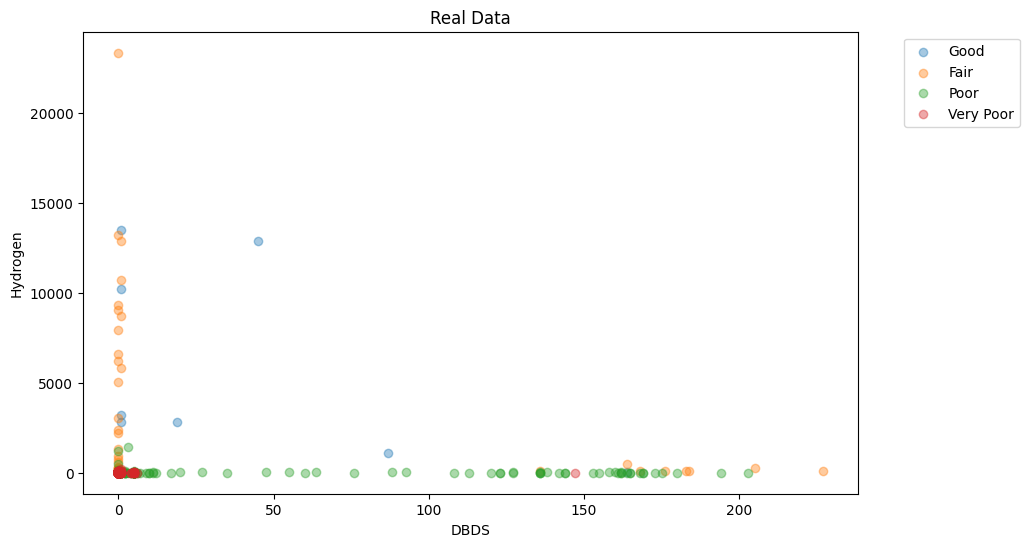

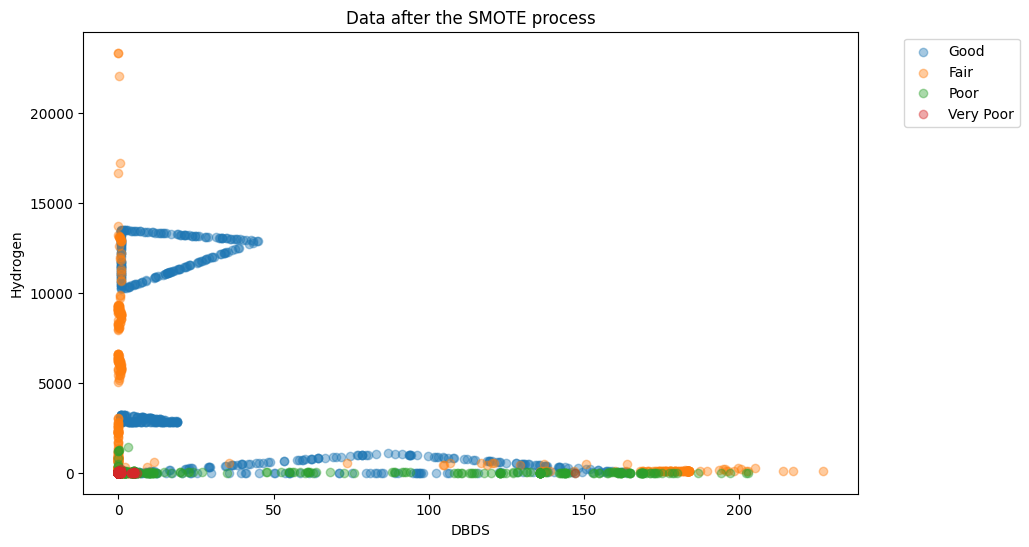

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

np.random.seed(0)
n_samples = 100
X1 = df_baru_analisis["DBDS"].values
X2 = df_baru_analisis["Hydrogen"].values

y = df_baru_analisis["Condition"].values

target_data_per_kelas = 600

c = (Counter(y))
print(c)

# SMOTE
smote = SMOTE(sampling_strategy={0: target_data_per_kelas - c[0], 1: target_data_per_kelas - c[1], 2: target_data_per_kelas- c[2], 3: target_data_per_kelas- c[3]}, k_neighbors=2)

X_resampled, y_resampled = smote.fit_resample(np.column_stack((X1, X2)), y)
# Visualisasi data asli
plt.figure(figsize=(10, 6))
for i in [3,2,1,0]:
  if i == 0:
    label_data = "Very Poor"
  if i == 1:
    label_data = "Poor"
  if i == 2:
    label_data = "Fair"
  if i == 3:
    label_data = "Good"
  plt.scatter(X1[y == i], X2[y == i], label=f'{label_data}', alpha=0.4)

plt.title('Real Data')
plt.xlabel('DBDS')
plt.ylabel('Hydrogen')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Pindahkan legenda ke luar
plt.show()

# Visualisasi data setelah SMOTE
plt.figure(figsize=(10, 6))
for i in [3,2,1,0]:
  if i == 0:
    label_data = "Very Poor"
  if i == 1:
    label_data = "Poor"
  if i == 2:
    label_data = "Fair"
  if i == 3:
    label_data = "Good"
  plt.scatter(X_resampled[y_resampled == i][:, 0], X_resampled[y_resampled == i][:, 1], label=f'{label_data}', alpha=0.4)

plt.title('Data after the SMOTE process')
plt.xlabel('DBDS')
plt.ylabel('Hydrogen')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Pindahkan legenda ke luar
plt.show()

470
920
1280
1525
1838
1968
2133
2400


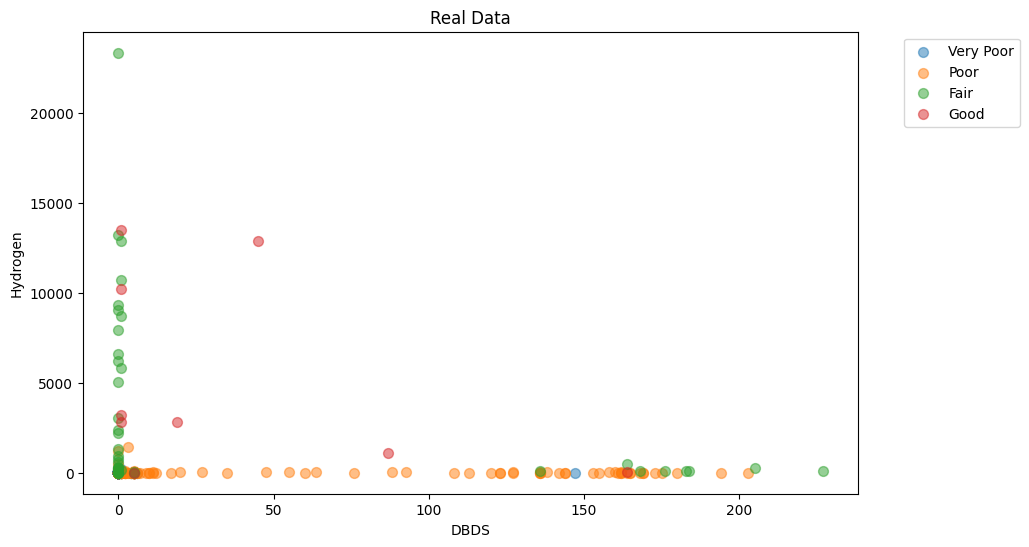

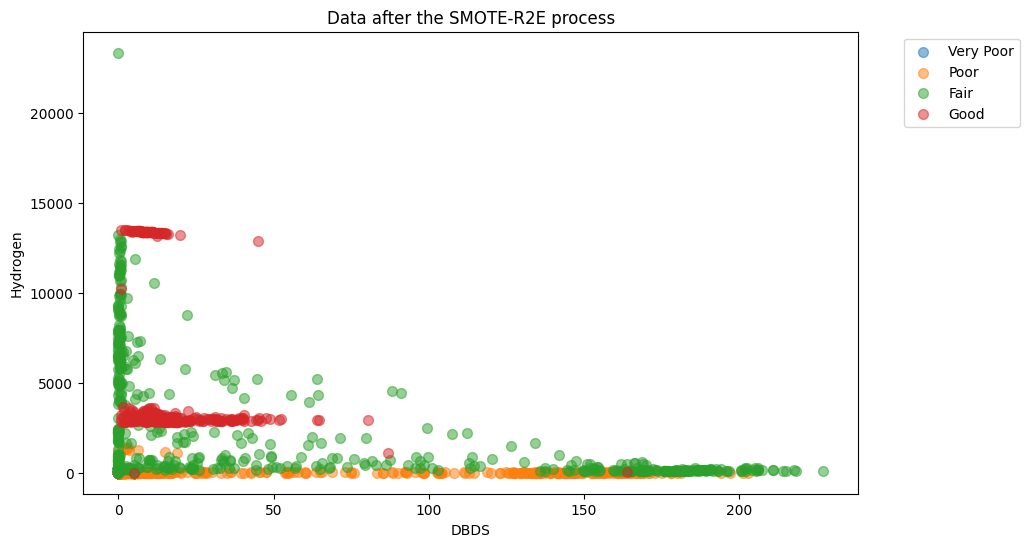

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import random


def SMOTE_R2E(X, y, k_tetangga=3, k_tetangga_cek=1, strategi_sampling=1.0, target_data_per_kelas=500):
    if strategi_sampling < 1.0:
        raise ValueError("Strategi sampling harus lebih besar atau sama dengan 1.0")

    # Menghitung jumlah sampel dalam setiap kelas
    unik, hitung = np.unique(y, return_counts=True)
    jumlah_kelas = dict(zip(unik, hitung))

    # Menghitung jumlah sampel sintetis yang akan dihasilkan
    target_sampel = {kelas: int(jumlah * strategi_sampling) for kelas, jumlah in jumlah_kelas.items()}

    # Inisialisasi array untuk menyimpan sampel sintetis
    X_resampled = []
    y_resampled = []

    # Melatih model Nearest Neighbors pada data asli
    knn = NearestNeighbors(n_neighbors=k_tetangga)
    knn.fit(X)

    # Membuat sampel sintetis
    for kelas, count in target_sampel.items():
        target_count = target_data_per_kelas

        if target_count > jumlah_kelas[kelas]:
            # Mencari tetangga terdekat dari sampel dalam kelas minoritas
            indeks = np.where(y == kelas)[0]
            target_tambahan = target_count-jumlah_kelas[kelas]
            tambahan_0 = 0

            for idx in indeks:
              if tambahan_0 < target_tambahan:
                stop2 = 0
                tetangga = knn.kneighbors([X[idx]], n_neighbors=k_tetangga, return_distance=False)[0]
                random.shuffle(list(tetangga))

                daftar_id_jumlah_tetangga = list(np.arange(k_tetangga))
                random.shuffle(daftar_id_jumlah_tetangga)

                for s in daftar_id_jumlah_tetangga:
                  if stop2 == 0:
                    tetangga_sejenis = tetangga[s]
                    # tetangga_sejenis = random.choice(tetangga)

                    if y[tetangga_sejenis] == kelas and tetangga_sejenis != idx:
                        perbedaan = X[tetangga_sejenis] - X[idx]
                        sampel_sintetis = X[idx] + np.random.rand() * perbedaan

                        tetangga_w = knn.kneighbors([sampel_sintetis], n_neighbors=k_tetangga_cek, return_distance=False)
                        daftar_kelas = []
                        for k in range(k_tetangga_cek):
                            tetangga_w1 = tetangga_w[0][k]
                            daftar_kelas.append(y[tetangga_w1])

                        number_dict = {num: daftar_kelas.count(num) for num in set(daftar_kelas)}

                        max_count = np.max(list(number_dict.values()))
                        numbers_with_max_count = [num for num, count in number_dict.items() if count == max_count]
                        hasil_kategori = numbers_with_max_count[0]
                        if hasil_kategori == kelas:
                          X_resampled.append(sampel_sintetis)
                          y_resampled.append(kelas)
                          stop2 = 1
                          tambahan_0 += 1

    # Mengonversi list ke array numpy
    X_resampled = np.array(X_resampled)
    y_resampled = np.array(y_resampled)

    return X_resampled, y_resampled


X_ros = np.column_stack((X1, X2))
y_ros = y
# Inisialisasi SMOTE_R2E
target_data = 600

total_data = 4*target_data

data_count = Counter(y_ros)
total_count = sum(data_count.values())

y_SMOTE = np.empty(0, dtype=int)
X_SMOTE = np.empty((0, 2))

print(total_count)
while total_count < total_data:
  X_ros2, y_ros2 = SMOTE_R2E(X_ros, y_ros, k_tetangga=99,  k_tetangga_cek=3, strategi_sampling=1, target_data_per_kelas=target_data)
  try:
    X_ros = np.vstack((X_ros, X_ros2))
    y_ros = np.concatenate((y_ros, y_ros2))
  except:
    pass
  data_count = Counter(y_ros)
  total_count = sum(data_count.values())
  print(total_count)

  try:
    X_SMOTE = np.vstack((X_SMOTE, X_ros2))
    y_SMOTE = np.concatenate((y_SMOTE, y_ros2))
  except:
    pass


X_resampled = X_ros
y_resampled = y_ros

# Visualisasi data asli
plt.figure(figsize=(10, 6))
for i in range(4):
  if i == 0:
    label_data = "Very Poor"
  if i == 1:
    label_data = "Poor"
  if i == 2:
    label_data = "Fair"
  if i == 3:
    label_data = "Good"
  plt.scatter(X1[y == i], X2[y == i], marker='o', s=50, label=f'{label_data}', alpha=0.5)

plt.title('Real Data')
plt.xlabel('DBDS')
plt.ylabel('Hydrogen')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Pindahkan legenda ke luar


# Visualisasi data setelah SMOTE
plt.figure(figsize=(10, 6))
for i in range(4):
  if i == 0:
    label_data = "Very Poor"
  if i == 1:
    label_data = "Poor"
  if i == 2:
    label_data = "Fair"
  if i == 3:
    label_data = "Good"
  plt.scatter(X_resampled[y_resampled == i][:, 0], X_resampled[y_resampled == i][:, 1], s=50, label=f'{label_data}', alpha=0.5)

plt.title('Data after the SMOTE-R2E process')
plt.xlabel('DBDS')
plt.ylabel('Hydrogen')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Pindahkan legenda ke luar

plt.show()


##Klasifikasi Kondisi dengan SMOTE-R2E


In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from collections import Counter
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import f1_score
import numpy as np
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import random

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import random
tf.get_logger().setLevel('ERROR')

def SMOTE_R2E(X, y, k_tetangga=3, k_tetangga_cek=1, strategi_sampling=1.0, target_data_per_kelas=500):
    if strategi_sampling < 1.0:
        raise ValueError("Strategi sampling harus lebih besar atau sama dengan 1.0")

    # Menghitung jumlah sampel dalam setiap kelas
    unik, hitung = np.unique(y, return_counts=True)
    jumlah_kelas = dict(zip(unik, hitung))

    # Menghitung jumlah sampel sintetis yang akan dihasilkan
    target_sampel = {kelas: int(jumlah * strategi_sampling) for kelas, jumlah in jumlah_kelas.items()}

    # Inisialisasi array untuk menyimpan sampel sintetis
    X_resampled = []
    y_resampled = []

    # Melatih model Nearest Neighbors pada data asli
    knn = NearestNeighbors(n_neighbors=k_tetangga)
    knn.fit(X)

    # Membuat sampel sintetis
    for kelas, count in target_sampel.items():
        target_count = target_data_per_kelas

        if target_count > jumlah_kelas[kelas]:
            # Mencari tetangga terdekat dari sampel dalam kelas minoritas
            indeks = np.where(y == kelas)[0]
            target_tambahan = target_count-jumlah_kelas[kelas]
            tambahan_0 = 0

            for idx in indeks:
              if tambahan_0 < target_tambahan:
                stop2 = 0
                tetangga = knn.kneighbors([X[idx]], n_neighbors=k_tetangga, return_distance=False)[0]
                random.shuffle(list(tetangga))

                daftar_id_jumlah_tetangga = list(np.arange(k_tetangga))
                random.shuffle(daftar_id_jumlah_tetangga)

                for s in daftar_id_jumlah_tetangga:
                  if stop2 == 0:
                    tetangga_sejenis = tetangga[s]
                    # tetangga_sejenis = random.choice(tetangga)

                    if y[tetangga_sejenis] == kelas and tetangga_sejenis != idx:
                        perbedaan = X[tetangga_sejenis] - X[idx]
                        sampel_sintetis = X[idx] + np.random.rand() * perbedaan

                        tetangga_w = knn.kneighbors([sampel_sintetis], n_neighbors=k_tetangga_cek, return_distance=False)
                        daftar_kelas = []
                        for k in range(k_tetangga_cek):
                            tetangga_w1 = tetangga_w[0][k]
                            daftar_kelas.append(y[tetangga_w1])

                        number_dict = {num: daftar_kelas.count(num) for num in set(daftar_kelas)}

                        max_count = np.max(list(number_dict.values()))
                        numbers_with_max_count = [num for num, count in number_dict.items() if count == max_count]
                        hasil_kategori = numbers_with_max_count[0]
                        if hasil_kategori == kelas:
                          X_resampled.append(sampel_sintetis)
                          y_resampled.append(kelas)
                          stop2 = 1
                          tambahan_0 += 1

    # Mengonversi list ke array numpy
    X_resampled = np.array(X_resampled)
    y_resampled = np.array(y_resampled)

    return X_resampled, y_resampled

Daftar_akurasi_Train_SMOTE_R2E = []
Daftar_F1_Train_SMOTE_R2E= []
Daftar_akurasi_Test_SMOTE_R2E = []
Daftar_F1_Test_SMOTE_R2E = []
Daftar_akurasi_SMOTE_SMOTE_R2E = []
Daftar_F1_SMOTE_SMOTE_R2E = []
for i in range(100):
  print("===================================", i)
  X_ros = X_train
  y_ros = y_norm_lagi_train

  target_data = 500

  total_data = 4*target_data

  data_count = Counter(y_ros)
  total_count = sum(data_count.values())
  # print(total_count)

  while total_count < total_data:
    X_ros2, y_ros2 = SMOTE_R2E(X_ros, y_ros, k_tetangga=total_count, k_tetangga_cek=3, strategi_sampling=1, target_data_per_kelas=target_data)
    try:
      X_ros = np.vstack((X_ros, X_ros2))
      y_ros = np.concatenate((y_ros, y_ros2))
    except:
      pass

    data_count = Counter(y_ros)
    total_count = sum(data_count.values())
    # print(data_count)

  initializer = tf.keras.initializers.HeUniform()

  model_sm = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, input_dim=6, kernel_initializer=initializer, activation= 'relu'),
      tf.keras.layers.Dense(32, kernel_initializer=initializer, activation='relu'),
      tf.keras.layers.Dense(16, kernel_initializer=initializer, activation='relu'),
      tf.keras.layers.Dense(4, kernel_initializer=initializer, activation='softmax')
  ])

  #training dan simpan model
  model_sm.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


  encoder = LabelEncoder()
  encoder.fit(y_ros)
  y_train_encoder = encoder.transform(y_ros)
  y_train_categorical = to_categorical(y_train_encoder)


  encoder_val = LabelEncoder()
  encoder_val.fit(y_norm_lagi_train)
  y_train_encoder_val = encoder.transform(y_norm_lagi_train)
  y_train_categorical_val = to_categorical(y_train_encoder_val)

  early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=300, restore_best_weights=True)
  history = model_sm.fit(X_ros, y_train_categorical, batch_size = 256, epochs=300, verbose=0, callbacks=[early_stopping])

  x_test_orig = balikin_normalisasi(X_train, X_train)
  y_test_orig = balikin_normalisasi(y_train, data_y)

  Predictions = model_sm.predict(X_train)
  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']
  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)

  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  print("Akurasi Train: " + str(Akurasi))

  F1 = f1_score(actual, predicted, average='weighted')
  print("F1-Score Train: " + str(F1))

  Daftar_akurasi_Train_SMOTE_R2E.append(Akurasi)
  Daftar_F1_Train_SMOTE_R2E.append(F1)

  #TEST
  x_test_orig = balikin_normalisasi(X_test, X_train)
  y_test_orig = balikin_normalisasi(y_test, data_y)

  Predictions = model_sm.predict(X_test)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  print("Akurasi Test: " + str(Akurasi))

  F1 = f1_score(actual, predicted, average='weighted')
  print("F1-Score Test: " + str(F1))
  Daftar_akurasi_Test_SMOTE_R2E.append(Akurasi)
  Daftar_F1_Test_SMOTE_R2E.append(F1)


  #SMOTE
  x_test_orig = balikin_normalisasi(X_ros, X_train)
  y_test_orig = y_ros

  Predictions = model_sm.predict(X_ros)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  # print("Akurasi SMOTE: " + str(Akurasi))
  F1 = f1_score(actual, predicted, average='weighted')
  # print("F1-Score SMOTE: " + str(F1))

  Daftar_akurasi_SMOTE_SMOTE_R2E.append(Akurasi)
  Daftar_F1_SMOTE_SMOTE_R2E.append(F1)

=================================== 0


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8276687593406461
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8267477203647415
63/63 [==============================] - 0s 2ms/step
=================================== 1


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8244369595104631
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8353843342116085
63/63 [==============================] - 0s 2ms/step
=================================== 2


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8177800537421259
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7792576218108134
63/63 [==============================] - 0s 1ms/step
=================================== 3


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8290330514054435
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8204953811683494
63/63 [==============================] - 0s 2ms/step
=================================== 4


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8149502262724467
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 5


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.827075600126158
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 6


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8404255319148937
F1-Score Train: 0.8390579803544994
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7935783365570601
63/63 [==============================] - 0s 1ms/step
=================================== 7


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.8322183050304993
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7917942466336118
63/63 [==============================] - 0s 1ms/step
=================================== 8


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8186918282662964
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8267477203647415
63/63 [==============================] - 0s 3ms/step
=================================== 9


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8404255319148937
F1-Score Train: 0.837201500759552
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 10


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8430851063829787
F1-Score Train: 0.8423290769262333
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8374932301740812
63/63 [==============================] - 0s 1ms/step
=================================== 11


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.820388619416261
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7902737032805278
63/63 [==============================] - 0s 2ms/step
=================================== 12


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8186297245222582
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7597745044553554
63/63 [==============================] - 0s 2ms/step
=================================== 13


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8297127633614632
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8005007279106137
63/63 [==============================] - 0s 2ms/step
=================================== 14


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8087541308076023
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7819993245525159
63/63 [==============================] - 0s 2ms/step
=================================== 15


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8162168484560703
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8306545890622761
63/63 [==============================] - 0s 2ms/step
=================================== 16


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8130768974640715
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8227197469543085
63/63 [==============================] - 0s 1ms/step
=================================== 17


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8266065827726956
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8204377736085053
63/63 [==============================] - 0s 1ms/step
=================================== 18


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8404255319148937
F1-Score Train: 0.8405718358585766
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.817682231278495
63/63 [==============================] - 0s 1ms/step
=================================== 19


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8138159318353557
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 20


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.8350167260100638
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7884590586718245
63/63 [==============================] - 0s 1ms/step
=================================== 21


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8248502592526371
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8388895643363729
63/63 [==============================] - 0s 1ms/step
=================================== 22


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.831663727231325
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 23


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8074963060659467
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8057781462036783
63/63 [==============================] - 0s 1ms/step
=================================== 24


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.815156332111208
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8353843342116085
63/63 [==============================] - 0s 2ms/step
=================================== 25


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8278913075937456
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8105397951142631
63/63 [==============================] - 0s 1ms/step
=================================== 26


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8158138289339175
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.842558513964845
63/63 [==============================] - 0s 2ms/step
=================================== 27


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8404255319148937
F1-Score Train: 0.8392982939293242
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8067238618165179
63/63 [==============================] - 0s 2ms/step
=================================== 28


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.8214223525061289
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8617021276595744
F1-Score Test: 0.8475330815756349
63/63 [==============================] - 0s 2ms/step
=================================== 29


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8125301354932907
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8406137753492678
63/63 [==============================] - 0s 2ms/step
=================================== 30


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.8308371281178156
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8278220502901354
63/63 [==============================] - 0s 1ms/step
=================================== 31


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.8309506564056135
3/3 [==============================] - 0s 7ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7836572411040497
63/63 [==============================] - 0s 2ms/step
=================================== 32


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8272410852982672
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.8617021276595744
F1-Score Test: 0.8509465671050657
63/63 [==============================] - 0s 2ms/step
=================================== 33


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.817114109023316
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.8000805931656997
63/63 [==============================] - 0s 1ms/step
=================================== 34


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8247461263756143
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8227197469543085
63/63 [==============================] - 0s 1ms/step
=================================== 35


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8377659574468085
F1-Score Train: 0.8381928728165373
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.790322318482519
63/63 [==============================] - 0s 2ms/step
=================================== 36


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8208116217955062
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.8033940116130178
63/63 [==============================] - 0s 1ms/step
=================================== 37


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8240644080614111
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8211806966500335
63/63 [==============================] - 0s 1ms/step
=================================== 38


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8307328114099766
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8166889564336373
63/63 [==============================] - 0s 2ms/step
=================================== 39


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8302986557453803
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.822090868512532
63/63 [==============================] - 0s 2ms/step
=================================== 40


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8031324661638363
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8185204582651392
63/63 [==============================] - 0s 1ms/step
=================================== 41


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8215304371315526
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8617021276595744
F1-Score Test: 0.8493519514251073
63/63 [==============================] - 0s 1ms/step
=================================== 42


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8073935914084251
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 43


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8191448684201794
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 2ms/step
=================================== 44


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8208132054378652
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8097517730496455
63/63 [==============================] - 0s 1ms/step
=================================== 45


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8198488419068138
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8198970487302677
63/63 [==============================] - 0s 1ms/step
=================================== 46


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8193310928548211
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8187266603579677
63/63 [==============================] - 0s 1ms/step
=================================== 47


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.8228359784854455
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8267477203647415
63/63 [==============================] - 0s 2ms/step
=================================== 48


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8271566368024632
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8617021276595744
F1-Score Test: 0.8475330815756349
63/63 [==============================] - 0s 2ms/step
=================================== 49


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8404255319148937
F1-Score Train: 0.8382045863791145
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7944883485309017
63/63 [==============================] - 0s 1ms/step
=================================== 50


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8302441662409943
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8294166002078422
63/63 [==============================] - 0s 2ms/step
=================================== 51


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8225214354620433
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.842558513964845
63/63 [==============================] - 0s 2ms/step
=================================== 52


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8289897907173903
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 2ms/step
=================================== 53


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.8305051012733485
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8723404255319149
F1-Score Test: 0.8594506769825919
63/63 [==============================] - 0s 1ms/step
=================================== 54


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8307591652873799
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8105397951142631
63/63 [==============================] - 0s 1ms/step
=================================== 55


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8205785886334808
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.808769999910565
63/63 [==============================] - 0s 2ms/step
=================================== 56


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8252820024553859
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8306545890622761
63/63 [==============================] - 0s 1ms/step
=================================== 57


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8085807206413348
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8393447064957184
63/63 [==============================] - 0s 1ms/step
=================================== 58


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.8341441828932562
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8312916398022783
63/63 [==============================] - 0s 2ms/step
=================================== 59


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8141810239046867
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7934677118327734
63/63 [==============================] - 0s 2ms/step
=================================== 60


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8113182146324907
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 61


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8404255319148937
F1-Score Train: 0.8395203576464112
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8057423318737864
63/63 [==============================] - 0s 2ms/step
=================================== 62


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8170395965676348
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8306545890622761
63/63 [==============================] - 0s 1ms/step
=================================== 63


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8132607087559202
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8617021276595744
F1-Score Test: 0.8508007320979181
63/63 [==============================] - 0s 1ms/step
=================================== 64


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.825470574536475
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7870238702118716
63/63 [==============================] - 0s 2ms/step
=================================== 65


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8081164041175458
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8346155762618964
63/63 [==============================] - 0s 1ms/step
=================================== 66


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8288509779210362
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8296735266117725
63/63 [==============================] - 0s 1ms/step
=================================== 67


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8299099888184922
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8120567375886524
63/63 [==============================] - 0s 2ms/step
=================================== 68


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8279999637503125
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 69


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.817070406347225
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8617021276595744
F1-Score Test: 0.8493519514251073
63/63 [==============================] - 0s 1ms/step
=================================== 70


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8136264983435662
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8388895643363729
63/63 [==============================] - 0s 1ms/step
=================================== 71


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8280328299046317
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8388895643363729
63/63 [==============================] - 0s 2ms/step
=================================== 72


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8457446808510638
F1-Score Train: 0.8423015171874073
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8617021276595744
F1-Score Test: 0.8475330815756349
63/63 [==============================] - 0s 2ms/step
=================================== 73


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8404255319148937
F1-Score Train: 0.8380669235063423
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 74


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8377659574468085
F1-Score Train: 0.8341763662658152
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 75


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8200291259666259
3/3 [==============================] - 0s 7ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7578769999295656
63/63 [==============================] - 0s 2ms/step
=================================== 76


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.810384925862352
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8067238618165179
63/63 [==============================] - 0s 1ms/step
=================================== 77


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8264588577038736
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8061091107474087
63/63 [==============================] - 0s 1ms/step
=================================== 78


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8165718934588343
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8294166002078422
63/63 [==============================] - 0s 1ms/step
=================================== 79


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8457446808510638
F1-Score Train: 0.8441029332343399
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8187266603579677
63/63 [==============================] - 0s 1ms/step
=================================== 80


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8161698859365296
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8393447064957184
63/63 [==============================] - 0s 2ms/step
=================================== 81


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.8284988988050327
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8388895643363729
63/63 [==============================] - 0s 2ms/step
=================================== 82


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8301833717816882
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8211806966500335
63/63 [==============================] - 0s 3ms/step
=================================== 83


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 6ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.8218034619354397
3/3 [==============================] - 0s 7ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8374932301740812
63/63 [==============================] - 0s 4ms/step
=================================== 84


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8149660137435141
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8133908644546943
63/63 [==============================] - 0s 1ms/step
=================================== 85


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8291970797765509
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7772653729735587
63/63 [==============================] - 0s 3ms/step
=================================== 86


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8108324935784577
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8198970487302677
63/63 [==============================] - 0s 2ms/step
=================================== 87


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.827817702319571
3/3 [==============================] - 0s 7ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.824245576549593
63/63 [==============================] - 0s 4ms/step
=================================== 88


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.8252850477441914
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7755805471124622
63/63 [==============================] - 0s 2ms/step
=================================== 89


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8191879115629863
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.824245576549593
63/63 [==============================] - 0s 2ms/step
=================================== 90


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8324468085106383
F1-Score Train: 0.831536395797997
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8294166002078422
63/63 [==============================] - 0s 3ms/step
=================================== 91


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.8271691871145317
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.8019222236994453
63/63 [==============================] - 0s 2ms/step
=================================== 92


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8155129979352679
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8227197469543085
63/63 [==============================] - 0s 1ms/step
=================================== 93


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.8248104652560448
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8305161296092582
63/63 [==============================] - 0s 1ms/step
=================================== 94


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8205128468935623
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.828762296957218
63/63 [==============================] - 0s 1ms/step
=================================== 95


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8202424213929763
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7638098003575011
63/63 [==============================] - 0s 2ms/step
=================================== 96


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8252444611301614
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8388895643363729
63/63 [==============================] - 0s 1ms/step
=================================== 97


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8271276595744681
F1-Score Train: 0.8234978182897269
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8322811564055742
63/63 [==============================] - 0s 1ms/step
=================================== 98


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.82346332070809
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7988803770709542
63/63 [==============================] - 0s 1ms/step
=================================== 99


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8199498160573515
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8317485271223176
63/63 [==============================] - 0s 1ms/step


In [ ]:
  x_test_orig = balikin_normalisasi(X_test, X_train)
  y_test_orig = balikin_normalisasi(y_test, data_y)

  Predictions = model_sm.predict(X_test)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  cm_df

3/3 [==============================] - 0s 4ms/step


,0,1,2,3
0,56,1,2,0
1,8,20,0,0
2,0,2,3,0
3,0,0,2,0


In [ ]:
print("Daftar Akurasi Train")
print(Daftar_akurasi_Train_SMOTE_R2E)
print("================================================")
print("Daftar F1 Train")
print(Daftar_F1_Train_SMOTE_R2E)
print("================================================")
print("Daftar Akurasi Test")
print(Daftar_akurasi_Test_SMOTE_R2E)
print("================================================")
print("Daftar F1 Test")
print(Daftar_F1_Test_SMOTE_R2E)
print("================================================")
print("Daftar Akurasi SMOTE")
print(Daftar_akurasi_SMOTE_SMOTE_R2E)
print("================================================")
print("Daftar F1 SMOTE")
print(Daftar_F1_SMOTE_SMOTE_R2E)


print("================================================")
print("Rangkuman Akurasi Train")
print(pd.Series(Daftar_akurasi_Train_SMOTE_R2E).describe())
print("================================================")
print("Rangkuman F1 Train")
print(pd.Series(Daftar_F1_Train_SMOTE_R2E).describe())
print("================================================")
print("Rangkuman Akurasi Test")
print(pd.Series(Daftar_akurasi_Test_SMOTE_R2E).describe())
print("================================================")
print("Rangkuman F1 Test")
print(pd.Series(Daftar_F1_Test_SMOTE_R2E).describe())
print("================================================")
print("Rangkuman Akurasi SMOTE")
print(pd.Series(Daftar_akurasi_SMOTE_SMOTE_R2E).describe())
print("================================================")
print("Rangkuman F1 SMOTE")
print(pd.Series(Daftar_F1_SMOTE_SMOTE_R2E).describe())


Daftar Akurasi Train
[0.8324468085106383, 0.8297872340425532, 0.8191489361702128, 0.8297872340425532, 0.8191489361702128, 0.8297872340425532, 0.8404255319148937, 0.8351063829787234, 0.824468085106383, 0.8404255319148937, 0.8430851063829787, 0.8218085106382979, 0.8164893617021277, 0.8324468085106383, 0.8111702127659575, 0.8218085106382979, 0.8164893617021277, 0.8297872340425532, 0.8404255319148937, 0.8164893617021277, 0.8351063829787234, 0.8297872340425532, 0.8351063829787234, 0.8138297872340425, 0.8218085106382979, 0.8297872340425532, 0.8191489361702128, 0.8404255319148937, 0.8271276595744681, 0.8164893617021277, 0.8351063829787234, 0.8351063829787234, 0.8297872340425532, 0.8191489361702128, 0.8297872340425532, 0.8377659574468085, 0.8191489361702128, 0.824468085106383, 0.8324468085106383, 0.8324468085106383, 0.8111702127659575, 0.824468085106383, 0.8111702127659575, 0.8218085106382979, 0.8218085106382979, 0.824468085106383, 0.8218085106382979, 0.8271276595744681, 0.8324468085106383, 0.

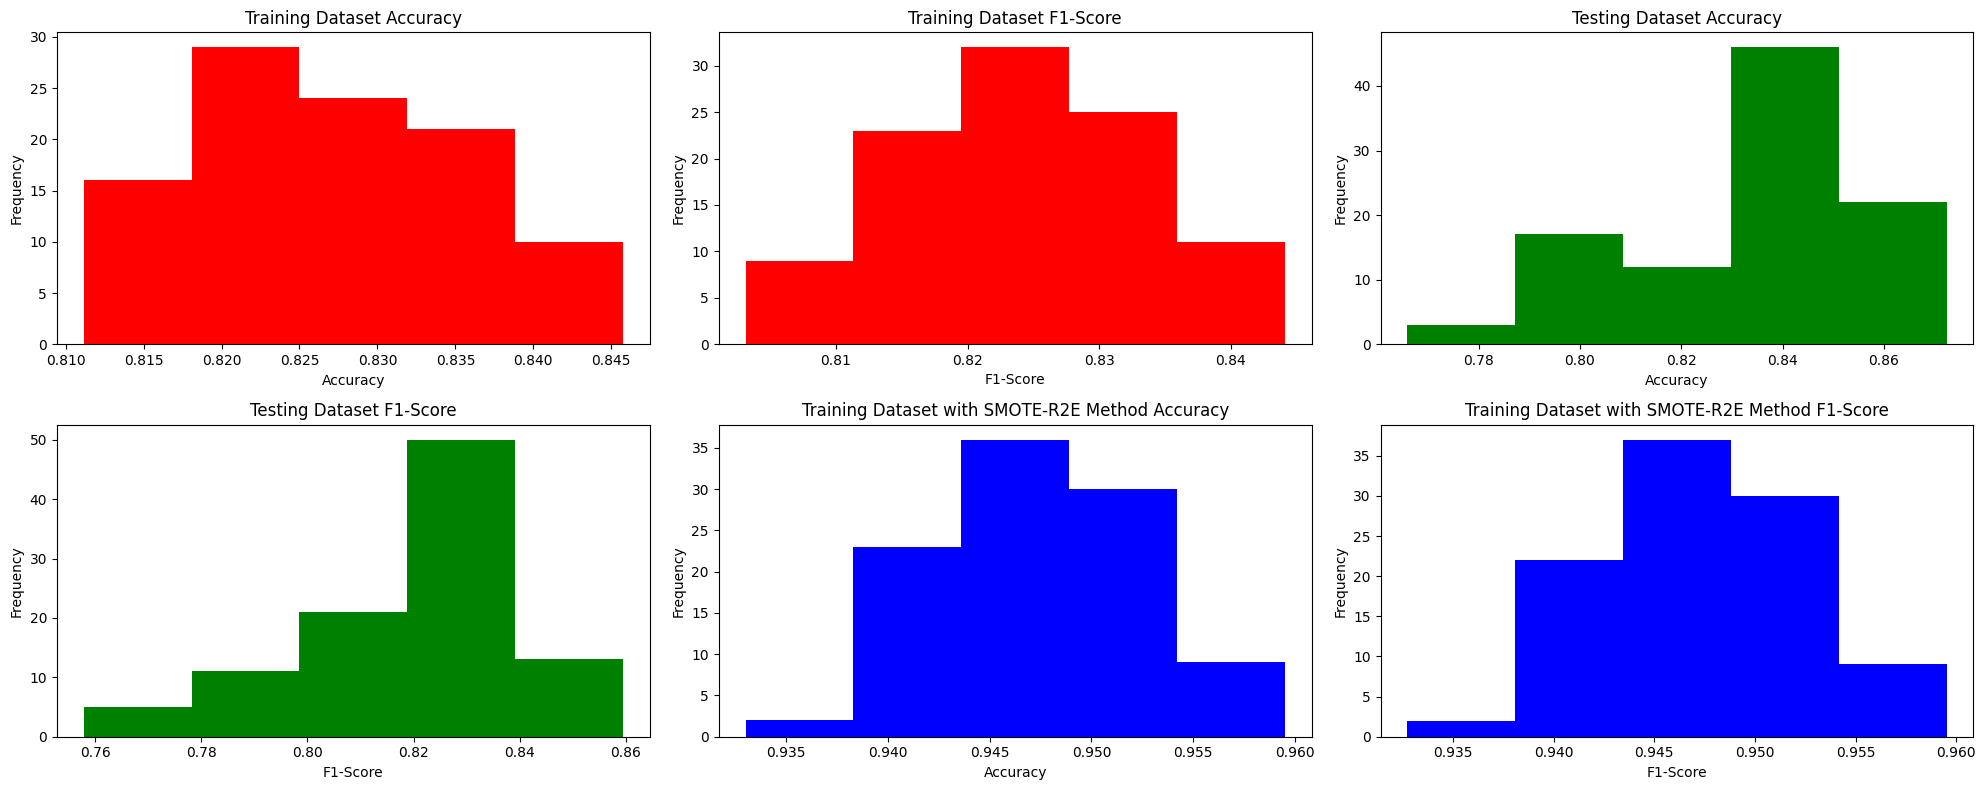

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a graph for Daftar Akurasi Train
plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
plt.hist(Daftar_akurasi_Train_SMOTE_R2E, bins=5, color="red")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Training Dataset Accuracy')

# Create a graph for Daftar F1 Train
plt.subplot(2, 3, 2)
plt.hist(Daftar_F1_Train_SMOTE_R2E, bins=5, color="red")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Training Dataset F1-Score')

# Create a graph for Daftar Akurasi Test
plt.subplot(2, 3, 3)
plt.hist(Daftar_akurasi_Test_SMOTE_R2E, bins=5, color="green")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Testing Dataset Accuracy')

# Create a graph for Daftar F1 Test
plt.subplot(2, 3, 4)
plt.hist(Daftar_F1_Test_SMOTE_R2E, bins=5, color="green")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Testing Dataset F1-Score')

# Create a graph for Daftar Akurasi SMOTE
plt.subplot(2, 3, 5)
plt.hist(Daftar_akurasi_SMOTE_SMOTE_R2E, bins=5, color="blue")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Training Dataset with SMOTE-R2E Method Accuracy')

# Create a graph for Daftar F1 SMOTE
plt.subplot(2, 3, 6)
plt.hist(Daftar_F1_SMOTE_SMOTE_R2E, bins=5, color="blue")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Training Dataset with SMOTE-R2E Method F1-Score')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


##Klasifikasi Kondisi dengan SMOTE saja

In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from collections import Counter
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import f1_score
import numpy as np
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import random

In [ ]:
#Milik Train
y_train = np.asarray(y_train_all[:,1])
data_y = np.asarray(data_y_all[:,1])
y_norm = np.asarray(y_norm_all[:,1])

y_norm_lagi_train = balikin_normalisasi(y_train, data_y)

value_y = [3, 2, 1, 0]
for s in value_y:
  print(str(s) + " || banyaknya " + str(len(y_norm_lagi_train[y_norm_lagi_train == s])))


#Milik Test
y_test = np.asarray(y_test_all[:,1])
data_y = np.asarray(data_y_all[:,1])
y_norm = np.asarray(y_norm_all[:,1])

y_norm_lagi_test = balikin_normalisasi(y_test, data_y)

value_y = [3, 2, 1, 0]
for s in value_y:
  print(str(s) + " || banyaknya " + str(len(y_norm_lagi_test[y_norm_lagi_test == s])))


import numpy as np
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import random
from imblearn.over_sampling import SMOTE

Daftar_akurasi_Train_SMOTE = []
Daftar_F1_Train_SMOTE = []
Daftar_akurasi_Test_SMOTE = []
Daftar_F1_Test_SMOTE = []
Daftar_akurasi_SMOTE_SMOTE = []
Daftar_F1_SMOTE_SMOTE = []

c = (Counter(y_norm_lagi_train))

for i in range(100):
  print("===================================", i)
  ## Performing the Smote oversampling
  # Tentukan target jumlah data per kelas
  target_data_per_kelas = 500

  # Inisialisasi SMOTE dengan target jumlah data per kelas
  smote = SMOTE(sampling_strategy={0: target_data_per_kelas-c[0], 1: target_data_per_kelas-c[1], 2: target_data_per_kelas-c[2], 3: target_data_per_kelas-c[3]})

  # Melakukan oversampling dengan SMOTE
  X_ros2, y_ros2 = smote.fit_resample(X_train, y_norm_lagi_train)
  X_ros = np.vstack((X_train, X_ros2))
  y_ros = np.concatenate((y_norm_lagi_train, y_ros2))

  print(Counter(y_ros))
  initializer = tf.keras.initializers.HeUniform()

  model_sm = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, input_dim=6, kernel_initializer=initializer, activation= 'relu'),
      tf.keras.layers.Dense(32, kernel_initializer=initializer, activation='relu'),
      tf.keras.layers.Dense(16, kernel_initializer=initializer, activation='relu'),
      tf.keras.layers.Dense(4, kernel_initializer=initializer, activation='softmax')
  ])

  #training dan simpan model
  model_sm.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


  encoder = LabelEncoder()
  encoder.fit(y_ros)
  y_train_encoder = encoder.transform(y_ros)
  y_train_categorical = to_categorical(y_train_encoder)


  encoder_val = LabelEncoder()
  encoder_val.fit(y_norm_lagi_train)
  y_train_encoder_val = encoder.transform(y_norm_lagi_train)
  y_train_categorical_val = to_categorical(y_train_encoder_val)

  early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=300, restore_best_weights=True)
  history = model_sm.fit(X_ros, y_train_categorical, batch_size = 256, epochs=300, verbose=0, callbacks=[early_stopping])

  x_test_orig = balikin_normalisasi(X_train, X_train)
  y_test_orig = balikin_normalisasi(y_train, data_y)

  Predictions = model_sm.predict(X_train)
  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']
  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)

  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  print("Akurasi Train: " + str(Akurasi))

  F1 = f1_score(actual, predicted, average='weighted')
  print("F1-Score Train: " + str(F1))

  Daftar_akurasi_Train_SMOTE.append(Akurasi)
  Daftar_F1_Train_SMOTE.append(F1)

  x_test_orig = balikin_normalisasi(X_test, X_train)
  y_test_orig = balikin_normalisasi(y_test, data_y)

  Predictions = model_sm.predict(X_test)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  print("Akurasi Test: " + str(Akurasi))

  F1 = f1_score(actual, predicted, average='weighted')
  print("F1-Score Test: " + str(F1))
  Daftar_akurasi_Test_SMOTE.append(Akurasi)
  Daftar_F1_Test_SMOTE.append(F1)

  #SMOTE
  x_test_orig = balikin_normalisasi(X_ros, X_train)
  y_test_orig = y_ros

  Predictions = model_sm.predict(X_ros)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  # print("Akurasi SMOTE: " + str(Akurasi))
  F1 = f1_score(actual, predicted, average='weighted')
  # print("F1-Score SMOTE: " + str(F1))

  Daftar_akurasi_SMOTE_SMOTE.append(Akurasi)
  Daftar_F1_SMOTE_SMOTE.append(F1)

3 || banyaknya 7
2 || banyaknya 37
1 || banyaknya 106
0 || banyaknya 226
3 || banyaknya 2
2 || banyaknya 5
1 || banyaknya 28
0 || banyaknya 59
=================================== 0
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8177568132359568
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7891055949566589
63/63 [==============================] - 0s 1ms/step
=================================== 1
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8179169022167402
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8259702960086637
63/63 [==============================] - 0s 1ms/step
=================================== 2
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.8134497024929433
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7817710716210893
63/63 [==============================] - 0s 1ms/step
=================================== 3
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8206941481577961
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7901012305267623
63/63 [==============================] - 0s 2ms/step
=================================== 4
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8225748178838609
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8259286432433901
63/63 [==============================] - 0s 2ms/step
=================================== 5
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7712765957446809
F1-Score Train: 0.7813969788067338
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7127659574468085
F1-Score Test: 0.7243346167983272
63/63 [==============================] - 0s 2ms/step
=================================== 6
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7811126513370305
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.723404255319149
F1-Score Test: 0.7382099367245896
63/63 [==============================] - 0s 1ms/step
=================================== 7
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.8138231978814463
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.800080289040546
63/63 [==============================] - 0s 1ms/step
=================================== 8
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7606382978723404
F1-Score Train: 0.7708441308909829
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7053952203731012
63/63 [==============================] - 0s 1ms/step
=================================== 9
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.7994024075474546
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7583421529627873
63/63 [==============================] - 0s 1ms/step
=================================== 10
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.8099169451224166
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7819655521783182
63/63 [==============================] - 0s 1ms/step
=================================== 11
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.8033588698186557
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7667727376718454
63/63 [==============================] - 0s 1ms/step
=================================== 12
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7659574468085106
F1-Score Train: 0.7750234389197154
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7075009001668064
63/63 [==============================] - 0s 2ms/step
=================================== 13
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.8127411673747067
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8064439781378098
63/63 [==============================] - 0s 1ms/step
=================================== 14
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7712765957446809
F1-Score Train: 0.7808863999584328
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7593674056440014
63/63 [==============================] - 0s 1ms/step
=================================== 15
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8218716352182036
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7901718915368053
63/63 [==============================] - 0s 1ms/step
=================================== 16
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.8105001161104141
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7522935779816513
63/63 [==============================] - 0s 1ms/step
=================================== 17
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.8014549431997642
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.723404255319149
F1-Score Test: 0.7348779415419319
63/63 [==============================] - 0s 1ms/step
=================================== 18
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.8019364561244668
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7830861809585214
63/63 [==============================] - 0s 1ms/step
=================================== 19
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.8029446791736816
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7646110613593552
63/63 [==============================] - 0s 2ms/step
=================================== 20
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.8044573732273975
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7793244518185958
63/63 [==============================] - 0s 2ms/step
=================================== 21
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.8095463052159079
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8039544379969912
63/63 [==============================] - 0s 1ms/step
=================================== 22
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7828731848589189
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7065081351689613
63/63 [==============================] - 0s 1ms/step
=================================== 23
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.7792553191489362
F1-Score Train: 0.7892407993903219
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7592127834618447
63/63 [==============================] - 0s 1ms/step
=================================== 24
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.811091372781066
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7740157064189153
63/63 [==============================] - 0s 2ms/step
=================================== 25
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8270568417002092
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8284954407294833
63/63 [==============================] - 0s 1ms/step
=================================== 26
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7792553191489362
F1-Score Train: 0.7860745463804499
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7736689259843202
63/63 [==============================] - 0s 1ms/step
=================================== 27
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8222645795534784
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.816895909449101
63/63 [==============================] - 0s 1ms/step
=================================== 28
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7659574468085106
F1-Score Train: 0.775844852502101
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7021276595744681
F1-Score Test: 0.7131901619191356
63/63 [==============================] - 0s 1ms/step
=================================== 29
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.8092931723097068
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8020195135049802
63/63 [==============================] - 0s 1ms/step
=================================== 30
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7952678453020907
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7021276595744681
F1-Score Test: 0.7137038931856712
63/63 [==============================] - 0s 1ms/step
=================================== 31
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.8030470105553157
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.808814292547992
63/63 [==============================] - 0s 2ms/step
=================================== 32
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8246666803700186
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7975785342370625
63/63 [==============================] - 0s 2ms/step
=================================== 33
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7920154736595166
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7559147258488768
63/63 [==============================] - 0s 1ms/step
=================================== 34
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8189542261157704
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.808814292547992
63/63 [==============================] - 0s 2ms/step
=================================== 35
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.776595744680851
F1-Score Train: 0.7861661421227013
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.723404255319149
F1-Score Test: 0.7357958848973103
63/63 [==============================] - 0s 1ms/step
=================================== 36
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8262209599518124
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8217494089834516
63/63 [==============================] - 0s 1ms/step
=================================== 37
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.8144210175317098
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7931864763189183
63/63 [==============================] - 0s 1ms/step
=================================== 38
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.8017523895398451
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7889300262717478
63/63 [==============================] - 0s 1ms/step
=================================== 39
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.795025217007814
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7785021119928657
63/63 [==============================] - 0s 1ms/step
=================================== 40
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7632978723404256
F1-Score Train: 0.773406469818909
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7039716312056739
63/63 [==============================] - 0s 1ms/step
=================================== 41
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7936051473870065
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7750322372662799
63/63 [==============================] - 0s 1ms/step
=================================== 42
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8245259088179631
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7922478227900327
63/63 [==============================] - 0s 1ms/step
=================================== 43
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7659574468085106
F1-Score Train: 0.7752534205815076
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7127659574468085
F1-Score Test: 0.7283390997175835
63/63 [==============================] - 0s 1ms/step
=================================== 44
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7943109864626596
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7591565066807179
63/63 [==============================] - 0s 2ms/step
=================================== 45
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8328282941223296
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8307872298974927
63/63 [==============================] - 0s 1ms/step
=================================== 46
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7951334465164254
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.80104039075141
63/63 [==============================] - 0s 1ms/step
=================================== 47
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.8008021787571471
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7634543178973717
63/63 [==============================] - 0s 2ms/step
=================================== 48
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8173454211515606
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8262157833880551
63/63 [==============================] - 0s 1ms/step
=================================== 49
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7830609067906622
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7013812967790768
63/63 [==============================] - 0s 1ms/step
=================================== 50
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8166726091531405
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8287688392327388
63/63 [==============================] - 0s 1ms/step
=================================== 51
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.8013302529387419
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7127659574468085
F1-Score Test: 0.7246455193465782
63/63 [==============================] - 0s 1ms/step
=================================== 52
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.8092773649556324
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7995425772941185
63/63 [==============================] - 0s 2ms/step
=================================== 53
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.8087635860966654
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7675933695651906
63/63 [==============================] - 0s 1ms/step
=================================== 54
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.807714962599968
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8044988896052726
63/63 [==============================] - 0s 2ms/step
=================================== 55
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.8055610625460747
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7645139816914166
63/63 [==============================] - 0s 2ms/step
=================================== 56
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7792553191489362
F1-Score Train: 0.7877210771276595
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.753334907958881
63/63 [==============================] - 0s 1ms/step
=================================== 57
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7893834875925169
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7570313831256206
63/63 [==============================] - 0s 1ms/step
=================================== 58
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7925262270518032
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7450676982591876
63/63 [==============================] - 0s 1ms/step
=================================== 59
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8216406192218841
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7859352816600779
63/63 [==============================] - 0s 1ms/step
=================================== 60
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.824468085106383
F1-Score Train: 0.8290120239239497
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.8144431598072042
63/63 [==============================] - 0s 1ms/step
=================================== 61
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7686170212765957
F1-Score Train: 0.7788872316165263
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7021276595744681
F1-Score Test: 0.7171737836631454
63/63 [==============================] - 0s 2ms/step
=================================== 62
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7712765957446809
F1-Score Train: 0.7799342989825416
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7127659574468085
F1-Score Test: 0.7285107987548539
63/63 [==============================] - 0s 1ms/step
=================================== 63
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7579787234042553
F1-Score Train: 0.7685532459829864
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7026700041718816
63/63 [==============================] - 0s 1ms/step
=================================== 64
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.807624671905179
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8052978166910906
63/63 [==============================] - 0s 1ms/step
=================================== 65
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.801069476246017
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7630656251242601
63/63 [==============================] - 0s 1ms/step
=================================== 66
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7972920062445552
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.723404255319149
F1-Score Test: 0.7397892021746376
63/63 [==============================] - 0s 1ms/step
=================================== 67
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.8137608372765065
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8036993282101068
63/63 [==============================] - 0s 1ms/step
=================================== 68
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7686170212765957
F1-Score Train: 0.7784424169906736
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7644026186579378
63/63 [==============================] - 0s 2ms/step
=================================== 69
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.8031142418918957
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7670339940494147
63/63 [==============================] - 0s 2ms/step
=================================== 70
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.8073792030205624
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.762197125683742
63/63 [==============================] - 0s 2ms/step
=================================== 71
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8297872340425532
F1-Score Train: 0.8356874566735989
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8051615445232465
63/63 [==============================] - 0s 1ms/step
=================================== 72
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8191489361702128
F1-Score Train: 0.8228303227901891
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8255473800686567
63/63 [==============================] - 0s 2ms/step
=================================== 73
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.825363774746245
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8040142233533956
63/63 [==============================] - 0s 1ms/step
=================================== 74
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8172936408605995
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8333333333333333
63/63 [==============================] - 0s 1ms/step
=================================== 75
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7886542545838654
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7578159166495205
63/63 [==============================] - 0s 1ms/step
=================================== 76
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.805016544701664
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.7556530453276384
63/63 [==============================] - 0s 1ms/step
=================================== 77
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.8093806798656248
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.8051337757102038
63/63 [==============================] - 0s 1ms/step
=================================== 78
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.8055667358687439
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7856187780597306
63/63 [==============================] - 0s 1ms/step
=================================== 79
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8218085106382979
F1-Score Train: 0.8233225130035339
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8393271449381692
63/63 [==============================] - 0s 1ms/step
=================================== 80
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.8001712401266157
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7765030464716548
63/63 [==============================] - 0s 1ms/step
=================================== 81
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7970757210032146
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7901718915368053
63/63 [==============================] - 0s 1ms/step
=================================== 82
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.804465973648287
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7739314906095963
63/63 [==============================] - 0s 1ms/step
=================================== 83
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7951571923309185
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.723404255319149
F1-Score Test: 0.7335533052679486
63/63 [==============================] - 0s 1ms/step
=================================== 84
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7579787234042553
F1-Score Train: 0.7679589563621435
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7020594653573378
63/63 [==============================] - 0s 1ms/step
=================================== 85
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7906126535685699
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7901718915368053
63/63 [==============================] - 0s 2ms/step
=================================== 86
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7941824409893352
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7340425531914894
F1-Score Test: 0.7425823979015468
63/63 [==============================] - 0s 2ms/step
=================================== 87
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8351063829787234
F1-Score Train: 0.8391644647634195
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8336457868372762
63/63 [==============================] - 0s 2ms/step
=================================== 88
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7962573087542634
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7446808510638298
F1-Score Test: 0.753041758819529
63/63 [==============================] - 0s 2ms/step
=================================== 89
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.812460151448793
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7738942123029067
63/63 [==============================] - 0s 1ms/step
=================================== 90
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.7990352002637238
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7773055575321994
63/63 [==============================] - 0s 1ms/step
=================================== 91
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8188261680382685
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8262157833880551
63/63 [==============================] - 0s 2ms/step
=================================== 92
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.82137132534319
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.772562632403058
63/63 [==============================] - 0s 1ms/step
=================================== 93
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7686170212765957
F1-Score Train: 0.7787157675792203
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.6914893617021277
F1-Score Test: 0.7040905948551104
63/63 [==============================] - 0s 1ms/step
=================================== 94
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7951223027299076
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7849836333878887
63/63 [==============================] - 0s 1ms/step
=================================== 95
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8211862847094412
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.851063829787234
F1-Score Test: 0.8535545423843295
63/63 [==============================] - 0s 1ms/step
=================================== 96
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.8038670869296852
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7744901105678165
63/63 [==============================] - 0s 1ms/step
=================================== 97
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.8106790088988297
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7856187780597306
63/63 [==============================] - 0s 2ms/step
=================================== 98
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.8138001989462184
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7681861867833233
63/63 [==============================] - 0s 2ms/step
=================================== 99
Counter({1.0: 500, 0.0: 500, 2.0: 500, 3.0: 500})


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (274) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (394) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (463) in class 2 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (493) in class 3 will be larger than the number of samples in the majority class (class #0.0 -> 226)
  warnings.warn(
/usr

12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8164893617021277
F1-Score Train: 0.8206199924050364
3/3 [==============================] - 0s 7ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8284954407294833
63/63 [==============================] - 0s 2ms/step


In [ ]:
  x_test_orig = balikin_normalisasi(X_test, X_train)
  y_test_orig = balikin_normalisasi(y_test, data_y)

  Predictions = model_sm.predict(X_test)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  cm_df

3/3 [==============================] - 0s 4ms/step


,0,1,2,3
0,50,9,0,0
1,3,22,0,3
2,0,1,4,0
3,0,0,1,1


In [ ]:
print("Daftar Akurasi Train")
print(Daftar_akurasi_Train_SMOTE)
print("================================================")
print("Daftar F1 Train")
print(Daftar_F1_Train_SMOTE)
print("================================================")
print("Daftar Akurasi Test")
print(Daftar_akurasi_Test_SMOTE)
print("================================================")
print("Daftar F1 Test")
print(Daftar_F1_Test_SMOTE)
print("================================================")
print("Daftar Akurasi SMOTE")
print(Daftar_akurasi_SMOTE_SMOTE)
print("================================================")
print("Daftar F1 SMOTE")
print(Daftar_F1_SMOTE_SMOTE)


print("================================================")
print("Rangkuman Akurasi Train")
print(pd.Series(Daftar_akurasi_Train_SMOTE).describe())
print("================================================")
print("Rangkuman F1 Train")
print(pd.Series(Daftar_F1_Train_SMOTE).describe())
print("================================================")
print("Rangkuman Akurasi Test")
print(pd.Series(Daftar_akurasi_Test_SMOTE).describe())
print("================================================")
print("Rangkuman F1 Test")
print(pd.Series(Daftar_F1_Test_SMOTE).describe())
print("================================================")
print("Rangkuman Akurasi SMOTE")
print(pd.Series(Daftar_akurasi_SMOTE_SMOTE).describe())
print("================================================")
print("Rangkuman F1 SMOTE")
print(pd.Series(Daftar_F1_SMOTE_SMOTE).describe())

Daftar Akurasi Train
[0.8111702127659575, 0.8138297872340425, 0.8058510638297872, 0.8138297872340425, 0.8218085106382979, 0.7712765957446809, 0.773936170212766, 0.8058510638297872, 0.7606382978723404, 0.7898936170212766, 0.8031914893617021, 0.7978723404255319, 0.7659574468085106, 0.8058510638297872, 0.7712765957446809, 0.8138297872340425, 0.8031914893617021, 0.7952127659574468, 0.7952127659574468, 0.7952127659574468, 0.7978723404255319, 0.8031914893617021, 0.773936170212766, 0.7792553191489362, 0.8058510638297872, 0.8218085106382979, 0.7792553191489362, 0.8191489361702128, 0.7659574468085106, 0.8058510638297872, 0.7872340425531915, 0.7952127659574468, 0.8191489361702128, 0.7845744680851063, 0.8138297872340425, 0.776595744680851, 0.8218085106382979, 0.8085106382978723, 0.7952127659574468, 0.7872340425531915, 0.7632978723404256, 0.7845744680851063, 0.8191489361702128, 0.7659574468085106, 0.7845744680851063, 0.8297872340425532, 0.7845744680851063, 0.7925531914893617, 0.8111702127659575, 0

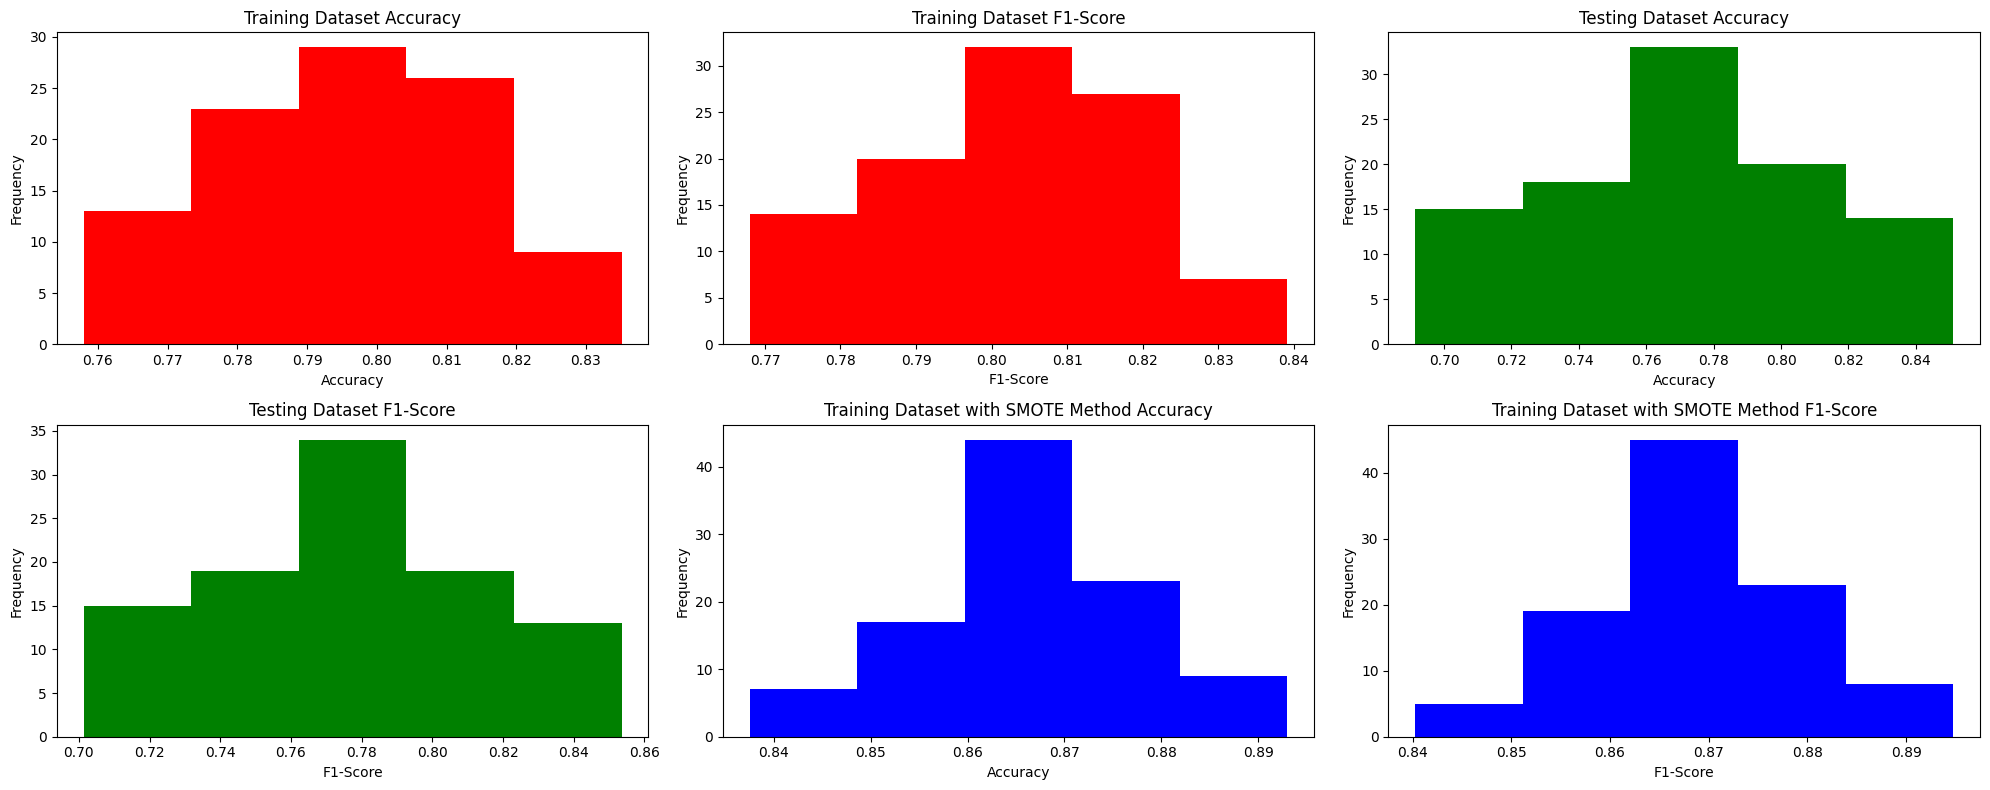

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a graph for Daftar Akurasi Train
plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
plt.hist(Daftar_akurasi_Train_SMOTE, bins=5, color="red")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Training Dataset Accuracy')

# Create a graph for Daftar F1 Train
plt.subplot(2, 3, 2)
plt.hist(Daftar_F1_Train_SMOTE, bins=5, color="red")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Training Dataset F1-Score')

# Create a graph for Daftar Akurasi Test
plt.subplot(2, 3, 3)
plt.hist(Daftar_akurasi_Test_SMOTE, bins=5, color="green")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Testing Dataset Accuracy')

# Create a graph for Daftar F1 Test
plt.subplot(2, 3, 4)
plt.hist(Daftar_F1_Test_SMOTE, bins=5, color="green")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Testing Dataset F1-Score')

# Create a graph for Daftar Akurasi SMOTE
plt.subplot(2, 3, 5)
plt.hist(Daftar_akurasi_SMOTE_SMOTE, bins=5, color="blue")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Training Dataset with SMOTE Method Accuracy')

# Create a graph for Daftar F1 SMOTE
plt.subplot(2, 3, 6)
plt.hist(Daftar_F1_SMOTE_SMOTE, bins=5, color="blue")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Training Dataset with SMOTE Method F1-Score')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


##Klasifikasi Kondisi tanpa SMOTE

In [ ]:
import io
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import tensorflow as tf
import time
import matplotlib.pyplot as plt

In [ ]:
#Punya Condition
y_train = np.asarray(y_train_all[:,1])
data_y = np.asarray(data_y_all[:,1])
y_norm = np.asarray(y_norm_all[:,1])

y_norm_lagi_train = balikin_normalisasi(y_train, data_y)

value_y = [3, 2, 1, 0]
for s in value_y:
  print(str(s) + " || banyaknya " + str(len(y_norm_lagi_train[y_norm_lagi_train == s])))


#Punya Condition
y_test = np.asarray(y_test_all[:,1])
data_y = np.asarray(data_y_all[:,1])
y_norm = np.asarray(y_norm_all[:,1])

y_norm_lagi_test = balikin_normalisasi(y_test, data_y)

value_y = [3, 2, 1, 0]
for s in value_y:
  print(str(s) + " || banyaknya " + str(len(y_norm_lagi_test[y_norm_lagi_test == s])))


import numpy as np
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import random
from imblearn.over_sampling import SMOTE

Daftar_akurasi_Train = []
Daftar_F1_Train = []
Daftar_akurasi_Test = []
Daftar_F1_Test = []

c = (Counter(y_norm_lagi_train))

for i in range(100):
  print("===================================", i)
  X_ros = X_train
  y_ros = y_norm_lagi_train

  print(Counter(y_ros))
  initializer = tf.keras.initializers.HeUniform()

  model_sm = tf.keras.models.Sequential([
      tf.keras.layers.Dense(16, input_dim=6, kernel_initializer=initializer, activation= 'relu'),
      tf.keras.layers.Dense(32, kernel_initializer=initializer, activation='relu'),
      tf.keras.layers.Dense(16, kernel_initializer=initializer, activation='relu'),
      tf.keras.layers.Dense(4, kernel_initializer=initializer, activation='softmax')
  ])
  #training dan simpan model
  model_sm.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


  encoder = LabelEncoder()
  encoder.fit(y_ros)
  y_train_encoder = encoder.transform(y_ros)
  y_train_categorical = to_categorical(y_train_encoder)


  encoder_val = LabelEncoder()
  encoder_val.fit(y_norm_lagi_train)
  y_train_encoder_val = encoder.transform(y_norm_lagi_train)
  y_train_categorical_val = to_categorical(y_train_encoder_val)

  early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=300, restore_best_weights=True)
  history = model_sm.fit(X_ros, y_train_categorical, batch_size = 256, epochs=300, verbose=0, callbacks=[early_stopping])

  x_test_orig = balikin_normalisasi(X_train, X_train)
  y_test_orig = balikin_normalisasi(y_train, data_y)

  Predictions = model_sm.predict(X_train)
  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']
  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)

  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  print("Akurasi Train: " + str(Akurasi))

  F1 = f1_score(actual, predicted, average='weighted')
  print("F1-Score Train: " + str(F1))

  Daftar_akurasi_Train.append(Akurasi)
  Daftar_F1_Train.append(F1)

  x_test_orig = balikin_normalisasi(X_test, X_train)
  y_test_orig = balikin_normalisasi(y_test, data_y)

  Predictions = model_sm.predict(X_test)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  Akurasi = sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
  print("Akurasi Test: " + str(Akurasi))

  F1 = f1_score(actual, predicted, average='weighted')
  print("F1-Score Test: " + str(F1))
  Daftar_akurasi_Test.append(Akurasi)
  Daftar_F1_Test.append(F1)

3 || banyaknya 7
2 || banyaknya 37
1 || banyaknya 106
0 || banyaknya 226
3 || banyaknya 2
2 || banyaknya 5
1 || banyaknya 28
0 || banyaknya 59
=================================== 0
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7897491334790884
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7945181476846058
=================================== 1
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 5ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7703497688776421
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7796985815602836
=================================== 2
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7784842758315839
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7721985815602838
=================================== 3
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.7895337897205613
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8222911973299958
=================================== 4
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.8032141381453106
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8165091600232302
=================================== 5
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.787939937607533
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7945761017893869
=================================== 6
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7553191489361702
F1-Score Train: 0.7441644155207623
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7701789935832488
=================================== 7
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7680196147318217
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7485348749428851
=================================== 8
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.7922654723362277
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7796985815602836
=================================== 9
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.7841406125384928
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7940042935931361
=================================== 10
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7792529785918327
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8178422469774563
=================================== 11
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7887090053396335
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8045607008760952
=================================== 12
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7579787234042553
F1-Score Train: 0.7497912499242286
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7512762791929082
=================================== 13
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7895622985783268
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7824248564674097
=================================== 14
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.7957993241197825
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7698914007092198
=================================== 15
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.7893748814993454
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8282516245475582
=================================== 16
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7669729028776394
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7738646034816249
=================================== 17
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.8010218515495239
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7747207018437106
=================================== 18
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7606382978723404
F1-Score Train: 0.7526606255536242
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7607012184033463
=================================== 19
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.7867892071451158
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7822439748222961
=================================== 20
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.8041918615944895
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8068053121318045
=================================== 21
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.7867892071451158
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7797204072895145
=================================== 22
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.7772520976707662
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7635396518375241
=================================== 23
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.8045609545488224
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8233371383877138
=================================== 24
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7941420015953874
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8165091600232302
=================================== 25
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.776562396146289
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7893974964995211
=================================== 26
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.7686170212765957
F1-Score Train: 0.7616233813463504
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7607012184033463
=================================== 27
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.789360645676976
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7512003154334937
=================================== 28
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7800267378159665
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7868723275071374
=================================== 29
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.7902165831106737
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8063856184995511
=================================== 30
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.7955353411710626
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8063856184995511
=================================== 31
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.788381643162385
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7822004000727407
=================================== 32
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7952127659574468
F1-Score Train: 0.7898448723715253
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7936570285506457
=================================== 33
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.7940754168992352
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8262845223195662
=================================== 34
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7910680018194997
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7828368794326241
=================================== 35
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7608524281000206
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7547556215294959
=================================== 36
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7791293357125635
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7921283775698251
=================================== 37
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.7966690441297518
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8117242907801417
=================================== 38
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7761883820741681
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7579211109249642
=================================== 39
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.7940317943126546
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8180457778082398
=================================== 40
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7741588158000646
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7801418439716313
=================================== 41
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7632978723404256
F1-Score Train: 0.7555670056785118
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7701789935832488
=================================== 42
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.776139516057835
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7669909215647053
=================================== 43
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7885499628076386
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7893369005403581
=================================== 44
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.7960455538816623
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8043026004728133
=================================== 45
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7790925560659943
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7824248564674097
=================================== 46
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7897770997139506
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.792387706855792
=================================== 47
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.7933714492072903
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7921283775698251
=================================== 48
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.7970116138321836
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7895057624113474
=================================== 49
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.801083424988306
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7726402863930221
=================================== 50
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.776595744680851
F1-Score Train: 0.7709994404552932
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7983998593282927
=================================== 51
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7686170212765957
F1-Score Train: 0.7596841882873185
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7701789935832488
=================================== 52
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.7932042993947407
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7796985815602836
=================================== 53
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7659574468085106
F1-Score Train: 0.7600221919702931
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.753665711879873
=================================== 54
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7857209190853681
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8404255319148937
F1-Score Test: 0.8240552377761291
=================================== 55
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7712765957446809
F1-Score Train: 0.7621515158886966
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7701789935832488
=================================== 56
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.783682370978189
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7945181476846058
=================================== 57
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.7967822281051519
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8184836388533633
=================================== 58
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.7817256766442853
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.749752597723899
=================================== 59
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8111702127659575
F1-Score Train: 0.8053583591161542
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7707437715948355
=================================== 60
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7596418238487475
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7539813562940297
=================================== 61
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.795836059797362
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8142654508611955
=================================== 62
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7743900297266824
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7701789935832488
=================================== 63
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.786951754385965
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8061976584822766
=================================== 64
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7978723404255319
F1-Score Train: 0.7885625021103074
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.766932327616879
=================================== 65
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.7937409141098377
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8020127803173539
=================================== 66
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.7824746494371378
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7918231122236129
=================================== 67
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7716161130931876
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8041278351168148
=================================== 68
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7733358136284725
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7572597653714017
=================================== 69
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8138297872340425
F1-Score Train: 0.8089219761854235
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7822004000727407
=================================== 70
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.7796840060189446
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7700859201110499
=================================== 71
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.776595744680851
F1-Score Train: 0.7686921881099154
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7579211109249642
=================================== 72
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.776595744680851
F1-Score Train: 0.7709083708831925
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7607012184033463
=================================== 73
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.7947180346396044
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7965994653924862
=================================== 74
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7723773726519637
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7768981252405303
=================================== 75
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.798917214210006
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7895057624113474
=================================== 76
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7686170212765957
F1-Score Train: 0.7552355710593501
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7574800531914894
=================================== 77
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 4ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.7991308890577505
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7796985815602836
=================================== 78
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7712765957446809
F1-Score Train: 0.7628131952317888
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7824248564674097
=================================== 79
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7819148936170213
F1-Score Train: 0.7740071434920528
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7818602618352306
=================================== 80
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8031914893617021
F1-Score Train: 0.7917951113961752
3/3 [==============================] - 0s 6ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7895057624113474
=================================== 81
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7792553191489362
F1-Score Train: 0.7710172865624132
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7701789935832488
=================================== 82
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7792553191489362
F1-Score Train: 0.7725992694684348
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8063856184995511
=================================== 83
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.776595744680851
F1-Score Train: 0.7706834475653855
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.7659574468085106
F1-Score Test: 0.7510705047976638
=================================== 84
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.7732105999543141
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.7991959012310539
=================================== 85
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.773398373775055
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7796985815602836
=================================== 86
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.7998609137923907
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8081941376325751
=================================== 87
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.8085106382978723
F1-Score Train: 0.8026234629159168
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7824248564674097
=================================== 88
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.800531914893617
F1-Score Train: 0.7946324780533345
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8043026004728133
=================================== 89
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.7858257994233254
3/3 [==============================] - 0s 3ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7921283775698251
=================================== 90
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7783076650087031
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8297872340425532
F1-Score Test: 0.8180457778082398
=================================== 91
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.7898936170212766
F1-Score Train: 0.7841943319748774
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7572597653714017
=================================== 92
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7845744680851063
F1-Score Train: 0.7743246589972731
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.79224295326423
=================================== 93
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 3ms/step
Akurasi Train: 0.8058510638297872
F1-Score Train: 0.7995426087867747
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8191489361702128
F1-Score Test: 0.8068053121318045
=================================== 94
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7872340425531915
F1-Score Train: 0.7754296346697908
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.7872340425531915
F1-Score Test: 0.7669909215647053
=================================== 95
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7712765957446809
F1-Score Train: 0.7617402272934687
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7574800531914894
=================================== 96
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7792553191489362
F1-Score Train: 0.7660381666930242
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7978723404255319
F1-Score Test: 0.7797204072895145
=================================== 97
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.776595744680851
F1-Score Train: 0.7717209827045727
3/3 [==============================] - 0s 4ms/step
Akurasi Test: 0.7553191489361702
F1-Score Test: 0.7464539007092198
=================================== 98
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.773936170212766
F1-Score Train: 0.7654466784325624
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.776595744680851
F1-Score Test: 0.7574800531914894
=================================== 99
Counter({0.0: 226, 1.0: 106, 2.0: 37, 3.0: 7})


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


12/12 [==============================] - 0s 2ms/step
Akurasi Train: 0.7925531914893617
F1-Score Train: 0.7839973290396541
3/3 [==============================] - 0s 5ms/step
Akurasi Test: 0.8085106382978723
F1-Score Test: 0.7921283775698251


In [ ]:
  x_test_orig = balikin_normalisasi(X_test, X_train)
  y_test_orig = balikin_normalisasi(y_test, data_y)

  Predictions = model_sm.predict(X_test)

  Predictions_klasifikasi = []

  for i in range(len(Predictions)):
    kelas = [0, 1, 2, 3]
    max = np.max(Predictions[i])
    pred_sem = []
    for s in range(len(kelas)):
      if Predictions[i][s] == max:
        Predictions_klasifikasi.append(kelas[s])

  TestingData_lengkap=pd.DataFrame()

  TestingData=pd.DataFrame(data=x_test_orig, columns=[Predictors])
  TestingData_lengkap = TestingData
  TestingData_lengkap['Aktual Kondisi'] = y_test_orig.astype(int)
  TestingData_lengkap['Prediksi Kondisi'] = Predictions_klasifikasi

  actual = TestingData_lengkap['Aktual Kondisi']
  predicted = TestingData_lengkap['Prediksi Kondisi']

  confusion_matrix = metrics.confusion_matrix(actual, predicted)

  prediksi_klasifikasi = pd.DataFrame()
  prediksi_klasifikasi['Prediksi klasifikasi'] = Predictions_klasifikasi
  prediksi_klasifikasi['Aktual klasifikasi'] =  y_test_orig.astype(int)

  cm_df = pd.DataFrame(confusion_matrix)
  cm_df

3/3 [==============================] - 0s 7ms/step


,0,1,2,3
0,56,3,0,0
1,11,17,0,0
2,1,1,3,0
3,0,0,2,0


In [ ]:
print("Daftar Akurasi Train")
print(Daftar_akurasi_Train)
print("================================================")
print("Daftar F1 Train")
print(Daftar_F1_Train)
print("================================================")
print("Daftar Akurasi Test")
print(Daftar_akurasi_Test)
print("================================================")
print("Daftar F1 Train")
print(Daftar_F1_Test)

print("================================================")
print("Mean Akurasi Train")
print(pd.Series(Daftar_akurasi_Train).describe())
print("================================================")
print("Mean F1 Train")
print(pd.Series(Daftar_F1_Train).describe())
print("================================================")
print("Mean Akurasi Test")
print(pd.Series(Daftar_akurasi_Test).describe())
print("================================================")
print("Mean F1 Test")
print(pd.Series(Daftar_F1_Test).describe())

Daftar Akurasi Train
[0.7978723404255319, 0.7819148936170213, 0.7872340425531915, 0.800531914893617, 0.8085106382978723, 0.7952127659574468, 0.7553191489361702, 0.773936170212766, 0.800531914893617, 0.7898936170212766, 0.7872340425531915, 0.7978723404255319, 0.7579787234042553, 0.7978723404255319, 0.8031914893617021, 0.7952127659574468, 0.773936170212766, 0.8058510638297872, 0.7606382978723404, 0.7952127659574468, 0.8085106382978723, 0.7952127659574468, 0.7925531914893617, 0.8085106382978723, 0.7978723404255319, 0.7898936170212766, 0.7686170212765957, 0.7898936170212766, 0.7845744680851063, 0.7952127659574468, 0.800531914893617, 0.7952127659574468, 0.7952127659574468, 0.8031914893617021, 0.7978723404255319, 0.773936170212766, 0.7872340425531915, 0.8058510638297872, 0.7819148936170213, 0.800531914893617, 0.7845744680851063, 0.7632978723404256, 0.7872340425531915, 0.7978723404255319, 0.8031914893617021, 0.7845744680851063, 0.7978723404255319, 0.800531914893617, 0.8085106382978723, 0.8058

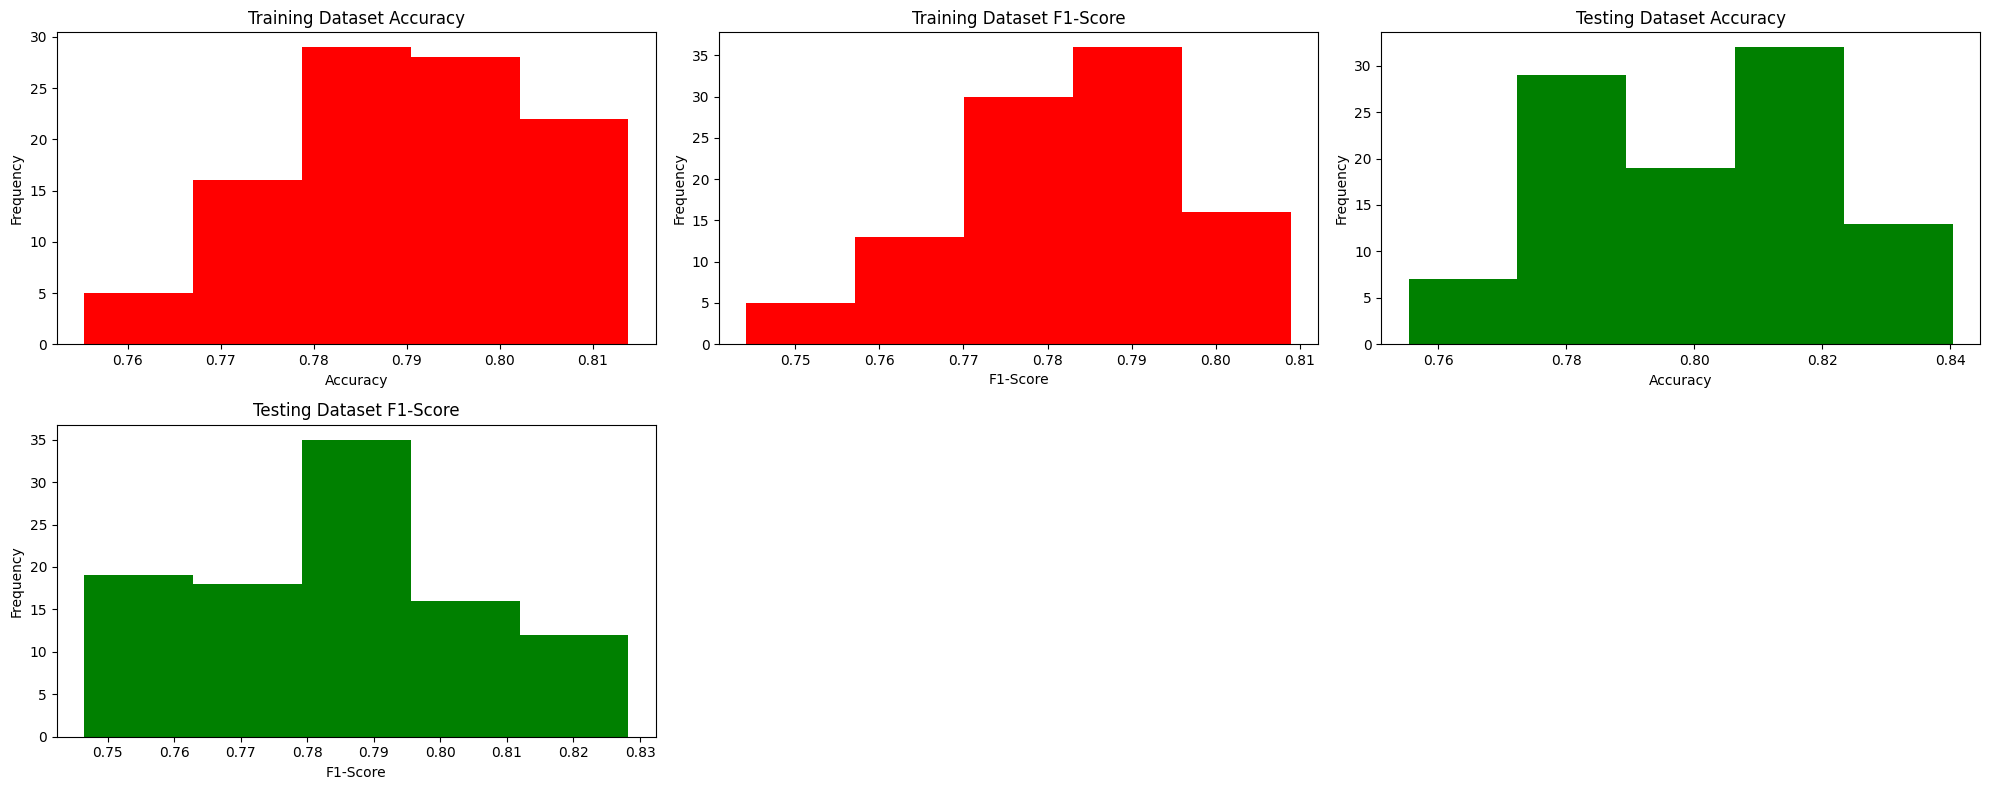

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a graph for Daftar Akurasi Train
plt.figure(figsize=(20, 8))
plt.subplot(2, 3, 1)
plt.hist(Daftar_akurasi_Train, bins=5, color="red")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Training Dataset Accuracy')

# Create a graph for Daftar F1 Train
plt.subplot(2, 3, 2)
plt.hist(Daftar_F1_Train, bins=5, color="red")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Training Dataset F1-Score')

# Create a graph for Daftar Akurasi Test
plt.subplot(2, 3, 3)
plt.hist(Daftar_akurasi_Test, bins=5, color="green")
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Testing Dataset Accuracy')

# Create a graph for Daftar F1 Test
plt.subplot(2, 3, 4)
plt.hist(Daftar_F1_Test, bins=5, color="green")
plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title('Testing Dataset F1-Score')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
